<a href="https://colab.research.google.com/github/Tejaswinid09/student_exam/blob/main/student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import joblib
import matplotlib.pyplot as plt


In [ ]:
# Load the datasets
mat_url = "student-mat.csv"
por_url = "student-por.csv"

In [ ]:
data_mat = pd.read_csv(mat_url, sep=';')
data_por = pd.read_csv(por_url, sep=';')

# Combine the datasets
data = pd.concat([data_mat, data_por], ignore_index=True)

In [ ]:
# Handle missing values if any
data = data.dropna()

# Feature engineering
# Assume 'G1', 'G2', and 'G3' are the previous exam scores, 'studytime' as hours studied,
# and 'absences' as attendance (modify according to actual dataset columns)
features = ['G1', 'G2', 'studytime', 'absences']
target = 'G3'  # 'G3' is the final exam score

In [ ]:
data = pd.get_dummies(data, drop_first=True)

# Check if selected features and target are in the dataset
if not all(col in data.columns for col in features + [target]):
    raise ValueError("Selected features or target variable not found in the dataset")

X = data[features]
y = data[target]

In [ ]:
# Train the model on the entire dataset
model = LinearRegression()
model.fit(X, y)

# Save the model (optional)
joblib.dump(model, 'student_exam_score_predictor.pkl')
print("Model trained and saved as 'student_exam_score_predictor.pkl'")

Model trained and saved as 'student_exam_score_predictor.pkl'


In [ ]:
# Function to predict exam score based on user input
def predict_exam_score(g1, g2, studytime, absences):
    # Create a DataFrame with user input
    input_data = pd.DataFrame([[g1, g2, studytime, absences]], columns=features)

    # Predict the exam score
    exam_score = model.predict(input_data)
    return exam_score[0]

In [ ]:
# Visualize predicted vs actual scores in a bar chart
def visualize_predictions():
    # Take some actual exam scores from the dataset for visualization
    sample_data = data.sample(n=5, random_state=42)  # Example: Take 10 random samples from the dataset
    actual_scores = sample_data[target]
    predicted_scores = []

    for index, row in sample_data.iterrows():
        predicted_scores.append(predict_exam_score(row['G1'], row['G2'], row['studytime'], row['absences']))

    # Plotting
    plt.figure(figsize=(10, 6))

    bar_width = 0.35
    index = np.arange(len(sample_data))

    plt.bar(index, actual_scores, bar_width, label='Actual Scores', color='b')
    plt.bar(index + bar_width, predicted_scores, bar_width, label='Predicted Scores', color='g')

    plt.xlabel('Student')
    plt.ylabel('Exam Scores')
    plt.title('Actual vs Predicted Exam Scores')
    plt.xticks(index + bar_width / 2, sample_data.index)
    plt.legend()

    plt.tight_layout()
    plt.show()

Enter previous exam score (G1): 33
Enter previous exam score (G2): 33
Enter study time (hours): 2
Enter number of absences: 2
Predicted Exam Score: 34.256074659168576


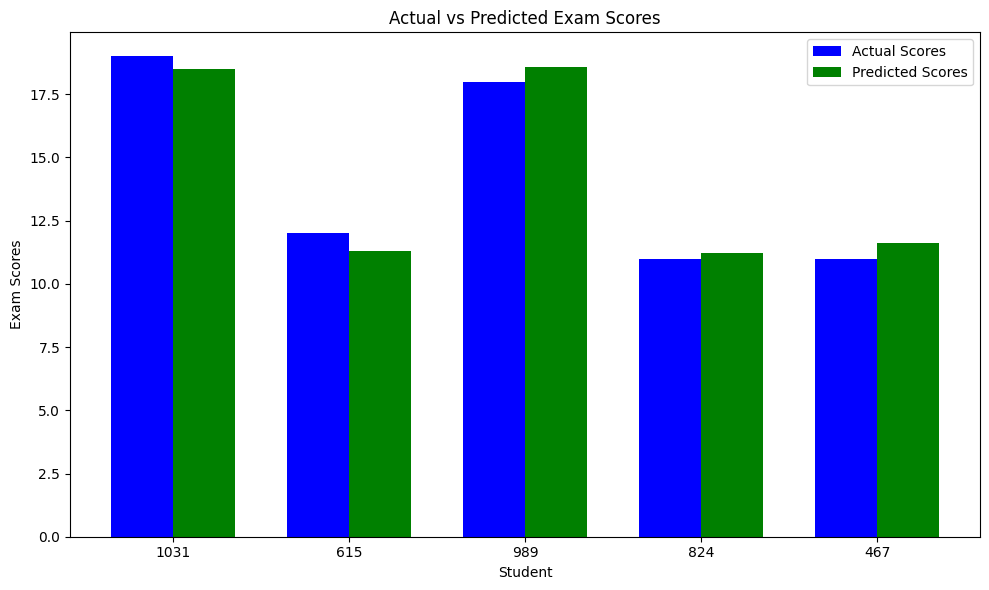

In [ ]:
# Example usage with dynamic input
while True:
    user_g1 = float(input("Enter previous exam score (G1): "))
    user_g2 = float(input("Enter previous exam score (G2): "))
    user_studytime = float(input("Enter study time (hours): "))
    user_absences = float(input("Enter number of absences: "))

    # Predict exam score based on user input
    predicted_score = predict_exam_score(user_g1, user_g2, user_studytime, user_absences)
    print(f"Predicted Exam Score: {predicted_score}")

    # Visualize predictions
    visualize_predictions()

    # Ask user if they want to continue or exit
    choice = input("Do you want to predict again? (yes/no): ").lower()
    if choice != 'yes':
        break